In [3]:
from causalinference_aagm.matching import PropensityScoreMatch as psm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [4]:
df = pd.read_csv('datasets/healtcare_stroke_data.csv')
def one_hot_encode(df):
    """
    One-hot encodes all object data type columns of a Pandas DataFrame.
    """
    # Get the object columns
    obj_cols = df.select_dtypes(include=['object']).columns
    # One-hot encode the object columns
    df = pd.get_dummies(df, columns=obj_cols)
    return df

df = one_hot_encode(df).fillna(0)
df.head()
df_model = df[['age','hypertension','heart_disease','bmi','stroke','gender_Male','smoking_status_smokes', 'avg_glucose_level']]
df_model.head()

,age,hypertension,heart_disease,bmi,stroke,gender_Male,smoking_status_smokes,avg_glucose_level
0,67.0,0,1,36.6,1,1,0,228.69
1,61.0,0,0,0.0,1,0,0,202.21
2,80.0,0,1,32.5,1,1,0,105.92
3,49.0,0,0,34.4,1,0,1,171.23
4,79.0,1,0,24.0,1,0,0,174.12


# Data Preparation

In [5]:
def hist_all_features(df, features, hue):
    width = 6*len(features)
    fig, axes = plt.subplots(ncols=len(features), figsize=(width, 5))
    for i in range(len(features)):
        sns.histplot(data=df, x=features[i], ax=axes[i], hue=hue)
    plt.show()


# Matching

In [6]:
features = ['age','hypertension','heart_disease','bmi','gender_Male', 'avg_glucose_level']
treatment = 'smoking_status_smokes'
outcome = 'stroke'

model = psm(df_model, features, treatment, outcome)

ATT: 0.004004049531218928
ATE: 0.0040040495312189395
ATC: 0.0040040495312189525


# Evaluation

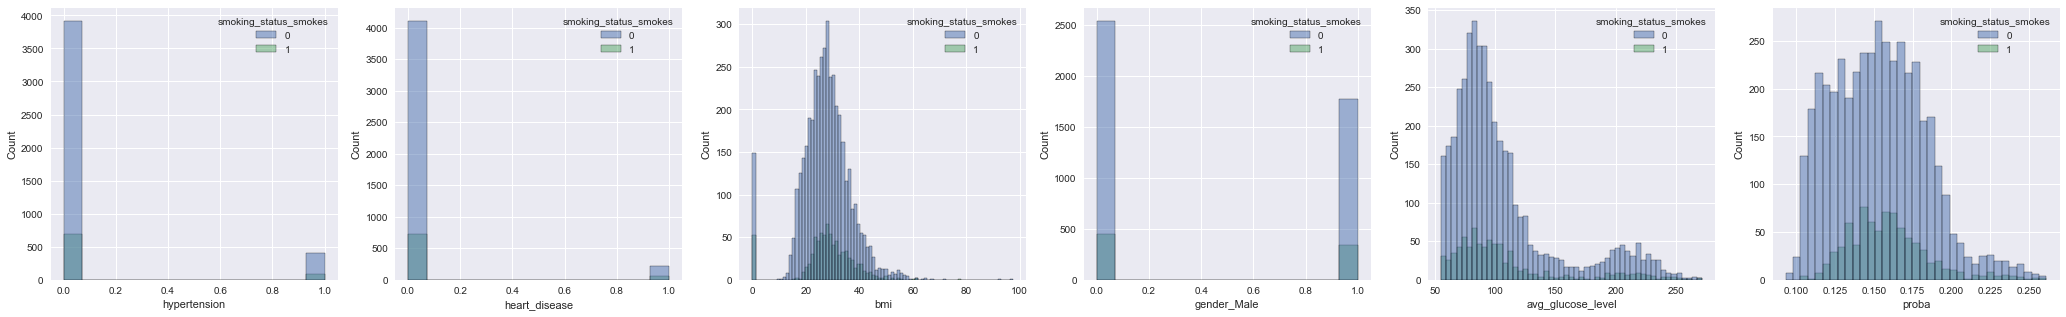

In [7]:
features = ['hypertension','heart_disease','bmi','gender_Male','avg_glucose_level','proba']
hist_all_features(model.df, features, hue='smoking_status_smokes')


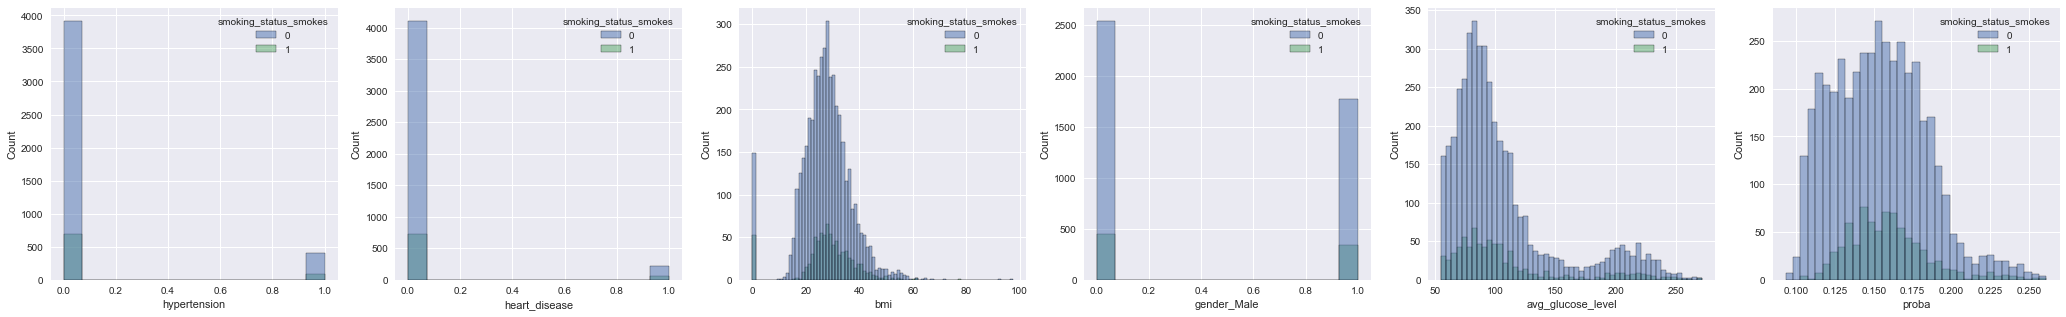

In [8]:
hist_all_features(model.df, features, hue='smoking_status_smokes')

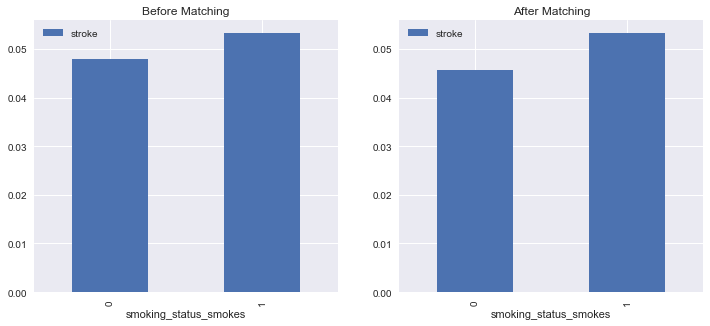

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Comparing Stroke Mean without Matching
stroke_by_treatment = model.df.groupby(treatment)[[outcome]].mean()
stroke_by_treatment.plot(kind='bar', ax=axes[0], title='Before Matching')

# Comparing Stroke Mean After Matching
stroke_by_treatment = model.df_matched.groupby(treatment)[[outcome]].mean()
stroke_by_treatment.plot(kind='bar', ax=axes[1], title='After Matching')

plt.show()


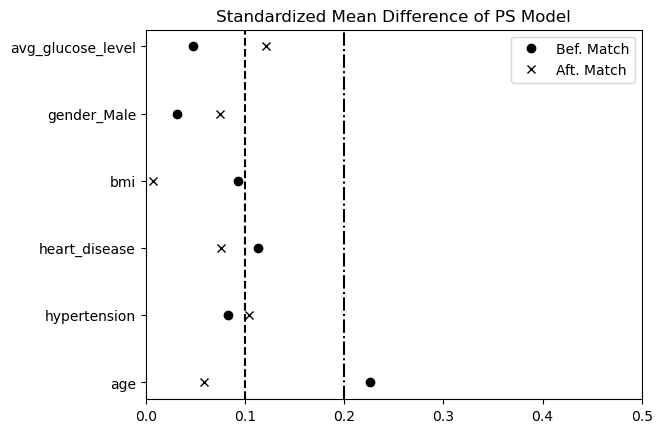

In [10]:
model.plot_smd()